In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

In [3]:
# import all the datasets
df1=pd.read_csv("/content/drive/MyDrive/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
df2=pd.read_csv("/content/drive/MyDrive/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
df3=pd.read_csv("/content/drive/MyDrive/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")
df4=pd.read_csv("/content/drive/MyDrive/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df5=pd.read_csv("/content/drive/MyDrive/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("/content/drive/MyDrive/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df7=pd.read_csv("/content/drive/MyDrive/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df8=pd.read_csv("/content/drive/MyDrive/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# concatenate all the datasets

df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])

In [5]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
df[' Label'].value_counts()  # there are 15 different classes

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

In [7]:
df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [8]:
# Removed some of the classes from dataset to have wide varity data samples.

df.drop(df.loc[df[' Label']=='DDoS'].index, inplace=True)
df.drop(df.loc[df[' Label']=='PortScan'].index, inplace=True)
df.drop(df.loc[df[' Label']=='Bot'].index, inplace=True)
df.drop(df.loc[df[' Label']=='Web Attack � Brute Force'].index, inplace=True)
df.drop(df.loc[df[' Label']=='Web Attack � XSS'].index, inplace=True)
df.drop(df.loc[df[' Label']=='Web Attack � Sql Injection'].index, inplace=True)
df.drop(df.loc[df[' Label']=='FTP-Patator'].index, inplace=True)
df.drop(df.loc[df[' Label']=='DoS Slowhttptest'].index, inplace=True)
df.drop(df.loc[df[' Label']=='DoS GoldenEye'].index, inplace=True)

In [9]:
df[' Label'].value_counts()   # Using only 6 data classes

BENIGN           1170722
DoS Hulk           70619
SSH-Patator         2922
DoS slowloris       2332
Heartbleed            11
Infiltration           4
Name:  Label, dtype: int64

In [10]:
import plotly.express as px
classes = ['Benign', 'DoS Hulk', 'DoS Slowloris', 'Heartbleed', 'Infiltration', 'SSH-Patator']
values = [1170772, 70619, 2332, 11, 4, 2992]

px.bar(df, x=classes, y=values, labels={'x': 'Network Class Type', 'y':'No. of Samples'}, log_y=True, text=values, title='Training Data')

In [11]:
features = [' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count',
       ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count',
       ' ECE Flag Count', ' Down/Up Ratio', ' Average Packet Size',
       ' Avg Fwd Segment Size', ' Avg Bwd Segment Size',
       ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk',
       ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Fwd Bytes',
       ' Subflow Bwd Packets', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' act_data_pkt_fwd',
       ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Active Max',
       ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max', ' Idle Min',
       ' Label']

In [12]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [13]:
data = df[features].copy()

In [14]:
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0000,0,0,0.0,0.0000,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0000,0,0,0.0,0.0000,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0000,0,0,0.0,0.0000,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0000,0,0,0.0,0.0000,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0000,0,0,0.0,0.0000,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186641,443,32423,2,2,12,12,6,6,6.000000,0.000000,...,20,0.0,0.0000,0,0,0.0,0.0000,0,0,BENIGN
186642,80,35673258,4,5,209,1656,197,0,52.250000,96.541442,...,20,0.0,0.0000,0,0,0.0,0.0000,0,0,BENIGN
186643,53,84941,1,1,57,161,57,57,57.000000,0.000000,...,32,0.0,0.0000,0,0,0.0,0.0000,0,0,BENIGN
186644,53,85421,4,2,184,300,46,46,46.000000,0.000000,...,32,0.0,0.0000,0,0,0.0,0.0000,0,0,BENIGN


In [15]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
data.dropna(inplace=True)
  
# Printing df
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0000,0,0,0.0,0.0000,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0000,0,0,0.0,0.0000,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0000,0,0,0.0,0.0000,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0000,0,0,0.0,0.0000,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0000,0,0,0.0,0.0000,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186641,443,32423,2,2,12,12,6,6,6.000000,0.000000,...,20,0.0,0.0000,0,0,0.0,0.0000,0,0,BENIGN
186642,80,35673258,4,5,209,1656,197,0,52.250000,96.541442,...,20,0.0,0.0000,0,0,0.0,0.0000,0,0,BENIGN
186643,53,84941,1,1,57,161,57,57,57.000000,0.000000,...,32,0.0,0.0000,0,0,0.0,0.0000,0,0,BENIGN
186644,53,85421,4,2,184,300,46,46,46.000000,0.000000,...,32,0.0,0.0000,0,0,0.0,0.0000,0,0,BENIGN


In [16]:
Labels=data.iloc[:,-1]

In [17]:
Features=data.iloc[:,:-1]

In [18]:
data.isnull().values.any()

False

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X=np.array(Features)
y=labelencoder_X.fit_transform(Labels)

Split the dataset to train and test set

In [20]:
from sklearn.model_selection import train_test_split
 
# split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Importance

In [22]:
X_train = pd.DataFrame(X_train, columns = Features.columns)


In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier();

rfc.fit(X_train, y_train);

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

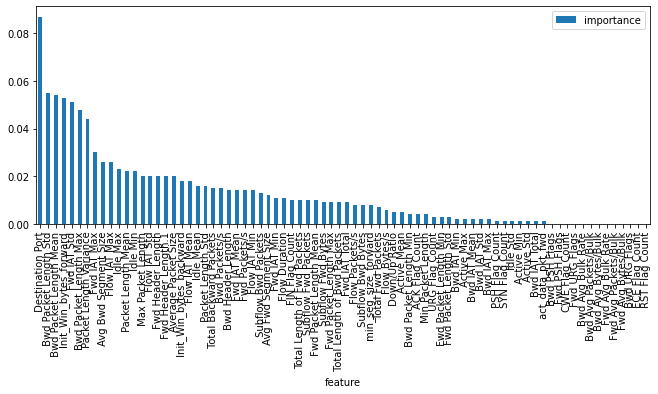

In [ ]:
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [24]:
importances=importances.head(10)

In [25]:
importances

,importance
feature,
Destination Port,0.084
Bwd Packet Length Std,0.077
Init_Win_bytes_forward,0.055
Bwd Packet Length Max,0.043
Bwd Packet Length Mean,0.041
Avg Bwd Segment Size,0.039
Packet Length Std,0.039
Fwd IAT Std,0.031
Packet Length Mean,0.029


In [34]:
features_final= [" Destination Port", " Bwd Packet Length Std","Init_Win_bytes_forward", "Bwd Packet Length Max",
                 " Bwd Packet Length Mean", " Avg Bwd Segment Size"," Packet Length Std"," Fwd IAT Std"," Packet Length Mean",
                 " Average Packet Size"," Label"]

In [35]:
dataset = data[features_final].copy()

In [36]:
Labels=dataset.iloc[:,-1]

In [37]:
Features=dataset.iloc[:,:-1]

In [38]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X=np.array(Features)
y=labelencoder_X.fit_transform(Labels)

In [39]:
from sklearn.model_selection import train_test_split
 
# split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# one hot encoding of categorical data

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
dataset[' Label'] = label_encoder.fit_transform(dataset[' Label'])

In [42]:
# Benign : 0
# DoS Hulk : 1
# DoS Slowloris :2
# Heartbleed: 3
# Infiltration: 4
# SSH-Patator: 5

dataset[' Label'].value_counts()

0    1169791
1      70302
5       2922
2       2332
3         11
4          4
Name:  Label, dtype: int64

In [43]:
# Saving the data in csv file for deep learning models

dataset.to_csv(r'drive/My Drive/data.csv', index = False)

In [44]:
from tensorflow.keras.utils import to_categorical

# data must be in dataframe to apply function, so convert
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

# apply function
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [45]:
X_test.shape

(373609, 10)

In [55]:
y_test.shape

(373609, 6)

In [56]:
# build the classifier model
from keras.models import Sequential
from keras.layers import Dense

#def baseline_model():
  # create model
model = Sequential()
model.add(Dense(24, input_dim=10, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 25, verbose = 2, validation_split = 0.2)

Epoch 1/25
682/682 - 4s - loss: 0.2797 - accuracy: 0.9485 - val_loss: 0.0982 - val_accuracy: 0.9686 - 4s/epoch - 5ms/step
Epoch 2/25
682/682 - 2s - loss: 0.0875 - accuracy: 0.9690 - val_loss: 0.0802 - val_accuracy: 0.9687 - 2s/epoch - 3ms/step
Epoch 3/25
682/682 - 3s - loss: 0.0767 - accuracy: 0.9693 - val_loss: 0.0735 - val_accuracy: 0.9690 - 3s/epoch - 4ms/step
Epoch 4/25
682/682 - 2s - loss: 0.0715 - accuracy: 0.9694 - val_loss: 0.0691 - val_accuracy: 0.9689 - 2s/epoch - 4ms/step
Epoch 5/25
682/682 - 2s - loss: 0.0676 - accuracy: 0.9694 - val_loss: 0.0645 - val_accuracy: 0.9690 - 2s/epoch - 2ms/step
Epoch 6/25
682/682 - 2s - loss: 0.0638 - accuracy: 0.9700 - val_loss: 0.0613 - val_accuracy: 0.9704 - 2s/epoch - 2ms/step
Epoch 7/25
682/682 - 2s - loss: 0.0606 - accuracy: 0.9728 - val_loss: 0.0590 - val_accuracy: 0.9792 - 2s/epoch - 2ms/step
Epoch 8/25
682/682 - 2s - loss: 0.0576 - accuracy: 0.9746 - val_loss: 0.0565 - val_accuracy: 0.9707 - 2s/epoch - 2ms/step
Epoch 9/25
682/682 - 2s 

In [58]:
score, acc = model.evaluate(X_test, y_test,verbose=2, batch_size= 256)

print('test accuracy:', acc)

1460/1460 - 2s - loss: 0.0393 - accuracy: 0.9819 - 2s/epoch - 1ms/step
test accuracy: 0.9818981885910034


In [59]:
yhat_probs= model.predict(X_test)
yhat_classes= np.argmax(yhat_probs, axis=1)

In [60]:
df_yhat_classes = pd.DataFrame(yhat_classes)
df_yhat_classes.value_counts()

0    346757
1     26157
5       433
2       254
3         8
dtype: int64

In [61]:
y_test_rounded = np.argmax(y_test, axis=1)

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_rounded, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test_rounded, yhat_classes, average='weighted', zero_division=0)
print('Precision: %f' % precision)
recall = recall_score(y_test_rounded, yhat_classes, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test_rounded, yhat_classes, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.981898
Precision: 0.984629
Recall: 0.981898
F1 score: 0.982251


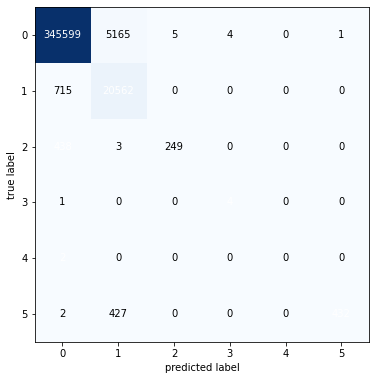

In [63]:
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix
import seaborn as sn

# confusion matrix
CM = confusion_matrix(y_test_rounded, yhat_classes)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(6, 8))
plt.show()

## **Implementing GAN model**

In [64]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')

In [65]:
df.columns

Index([' Destination Port', ' Bwd Packet Length Std', 'Init_Win_bytes_forward',
       'Bwd Packet Length Max', ' Bwd Packet Length Mean',
       ' Avg Bwd Segment Size', ' Packet Length Std', ' Fwd IAT Std',
       ' Packet Length Mean', ' Average Packet Size', ' Label'],
      dtype='object')

In [66]:
df[' Label'].value_counts()

0    1169791
1      70302
5       2922
2       2332
3         11
4          4
Name:  Label, dtype: int64

In [67]:
df_benign = df.loc[df[' Label']==0]
df_dosHulk = df.loc[df[' Label']==1]
df_sshPatator = df.loc[df[' Label']==2]
df_dosSlowloris = df.loc[df[' Label']==3]
df_heartbleed = df.loc[df[' Label']==4]
df_infiltration = df.loc[df[' Label']==5]

In [68]:
df_benign = df_benign.drop([' Label'], axis=1)
df_dosHulk = df_dosHulk.drop([' Label'], axis=1)
df_sshPatator = df_sshPatator.drop([' Label'], axis=1)
df_dosSlowloris = df_dosSlowloris.drop([' Label'], axis=1)
df_heartbleed = df_heartbleed.drop([' Label'], axis=1)
df_infiltration = df_infiltration.drop([' Label'], axis=1)

In [69]:
from sklearn.preprocessing import PowerTransformer
pw= PowerTransformer(method='yeo-johnson', standardize=True, copy=True)

pwt_benign = pw.fit_transform(df_benign[df_benign.columns])
pwt_dosHulk = pw.fit_transform(df_dosHulk[df_dosHulk.columns])
pwt_sshPatator = pw.fit_transform(df_sshPatator[df_sshPatator.columns])
pwt_dosSlowloris = pw.fit_transform(df_dosSlowloris[df_dosSlowloris.columns])
pwt_heartbleed = pw.fit_transform(df_heartbleed[df_heartbleed.columns])
pwt_infiltration = pw.fit_transform(df_infiltration[df_infiltration.columns])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning:

divide by zero encountered in log



In [70]:
df_pwt_benign = pd.DataFrame(pwt_benign)
df_pwt_dosHulk = pd.DataFrame(pwt_dosHulk)
df_pwt_sshPatator = pd.DataFrame(pwt_sshPatator)
df_pwt_dosSlowloris = pd.DataFrame(pwt_dosSlowloris)
df_pwt_heartbleed = pd.DataFrame(pwt_heartbleed)
df_pwt_infiltration = pd.DataFrame(pwt_infiltration)

In [71]:
df_pwt_benign.columns = [' Destination Port', ' Bwd Packet Length Std', 'Init_Win_bytes_forward',
       'Bwd Packet Length Max', ' Bwd Packet Length Mean',
       ' Avg Bwd Segment Size', ' Packet Length Std', ' Fwd IAT Std',
       ' Packet Length Mean', ' Average Packet Size']

df_pwt_dosHulk.columns = [' Destination Port', ' Bwd Packet Length Std', 'Init_Win_bytes_forward',
       'Bwd Packet Length Max', ' Bwd Packet Length Mean',
       ' Avg Bwd Segment Size', ' Packet Length Std', ' Fwd IAT Std',
       ' Packet Length Mean', ' Average Packet Size']

df_pwt_sshPatator.columns =[' Destination Port', ' Bwd Packet Length Std', 'Init_Win_bytes_forward',
       'Bwd Packet Length Max', ' Bwd Packet Length Mean',
       ' Avg Bwd Segment Size', ' Packet Length Std', ' Fwd IAT Std',
       ' Packet Length Mean', ' Average Packet Size']

df_pwt_dosSlowloris.columns = [' Destination Port', ' Bwd Packet Length Std', 'Init_Win_bytes_forward',
       'Bwd Packet Length Max', ' Bwd Packet Length Mean',
       ' Avg Bwd Segment Size', ' Packet Length Std', ' Fwd IAT Std',
       ' Packet Length Mean', ' Average Packet Size']

df_pwt_heartbleed.columns = [' Destination Port', ' Bwd Packet Length Std', 'Init_Win_bytes_forward',
       'Bwd Packet Length Max', ' Bwd Packet Length Mean',
       ' Avg Bwd Segment Size', ' Packet Length Std', ' Fwd IAT Std',
       ' Packet Length Mean', ' Average Packet Size']

df_pwt_infiltration.columns = [' Destination Port', ' Bwd Packet Length Std', 'Init_Win_bytes_forward',
       'Bwd Packet Length Max', ' Bwd Packet Length Mean',
       ' Avg Bwd Segment Size', ' Packet Length Std', ' Fwd IAT Std',
       ' Packet Length Mean', ' Average Packet Size']

In [72]:
df_pwt_benign.head()

,Destination Port,Bwd Packet Length Std,Init_Win_bytes_forward,Bwd Packet Length Max,Bwd Packet Length Mean,Avg Bwd Segment Size,Packet Length Std,Fwd IAT Std,Packet Length Mean,Average Packet Size
0,1.647164,-0.489545,0.722691,-1.421426,-1.432506,-1.432506,-1.364039,-0.610658,-0.945836,-0.899631
1,1.647164,-0.489545,0.722691,-1.421426,-1.432506,-1.432506,-1.364039,-0.610658,-0.945836,-0.899631
2,1.647164,-0.489545,0.722691,-1.421426,-1.432506,-1.432506,-1.364039,-0.610658,-0.945836,-0.899631
3,1.647164,-0.489545,0.722691,-1.421426,-1.432506,-1.432506,-1.364039,-0.610658,-0.945836,-0.899631
4,1.647736,-0.489545,0.667633,-1.421426,-1.432506,-1.432506,-1.364039,-0.610658,-0.945836,-0.899631


In [73]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import Model

from tensorflow.keras.optimizers import Adam

class GAN():
    
    def __init__(self, gan_args):
        [self.batch_size, lr, self.noise_dim,
         self.data_dim, layers_dim] = gan_args

        self.generator = Generator(self.batch_size).\
            build_model(input_shape=(self.noise_dim,), dim=layers_dim, data_dim=self.data_dim)

        self.discriminator = Discriminator(self.batch_size).\
            build_model(input_shape=(self.data_dim,), dim=layers_dim)

        optimizer = Adam(lr, 0.5)

        # Build and compile the discriminator
        self.discriminator.compile(loss='binary_crossentropy',
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        # The generator takes noise as input and generates samples
        z = Input(shape=(self.noise_dim,))
        record = self.generator(z)

        # For the combined model only the generator is trained
        self.discriminator.trainable = False

        # The discriminator takes generated samples as input and determines validity
        validity = self.discriminator(record)

        # The combined model 
        # Trains the generator to try and create samples that will fool the discriminator 
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def get_data_batch(self, train, batch_size, seed=0):
        # # random sampling - some samples will have excessively low or high sampling, but easy to implement
        # np.random.seed(seed)
        # x = train.loc[ np.random.choice(train.index, batch_size) ].values
        # iterate through shuffled indices, so every sample gets covered evenly

        start_i = (batch_size * seed) % len(train)
        stop_i = start_i + batch_size
        shuffle_seed = (batch_size * seed) // len(train)
        np.random.seed(shuffle_seed)
        train_ix = np.random.choice(list(train.index), replace=False, size=len(train))  # wasteful to shuffle every time
        train_ix = list(train_ix) + list(train_ix)  # duplicate to cover ranges past the end of the set
        x = train.loc[train_ix[start_i: stop_i]].values
        return np.reshape(x, (batch_size, -1))
        
    def train(self, data, train_arguments):
        [cache_prefix, epochs, sample_interval] = train_arguments
        
        data_cols = data.columns

        # Adversarial ground truths
        valid = np.ones((self.batch_size, 1))
        fake = np.zeros((self.batch_size, 1))

        for epoch in range(epochs):    
            # Discriminator
            batch_data = self.get_data_batch(data, self.batch_size)
            noise = tf.random.normal((self.batch_size, self.noise_dim))

            # Generate a batch of new samples
            gen_data = self.generator.predict(noise)
    
            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(batch_data, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_data, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
            # Generator
            noise = tf.random.normal((self.batch_size, self.noise_dim))
            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)
    
            # Plot the progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))
    
    
class Generator():
    def __init__(self, batch_size):
        self.batch_size=batch_size
        
    def build_model(self, input_shape, dim, data_dim):
        input= Input(shape=input_shape, batch_size=self.batch_size)
        x = Dense(dim, activation='relu')(input)
        x = Dense(dim * 2, activation='relu')(x)
        x = Dense(dim * 4, activation='relu')(x)
        x = Dense(data_dim)(x)
        return Model(inputs=input, outputs=x)

class Discriminator():
    def __init__(self,batch_size):
        self.batch_size=batch_size
    
    def build_model(self, input_shape, dim):
        input = Input(shape=input_shape, batch_size=self.batch_size)
        x = Dense(dim * 4, activation='relu')(input)
        x = Dropout(0.1)(x)
        x = Dense(dim * 2, activation='relu')(x)
        x = Dropout(0.1)(x)
        x = Dense(dim, activation='relu')(x)
        x = Dense(1, activation='sigmoid')(x)
        return Model(inputs=input, outputs=x)

In [76]:
data_columns = df_pwt_benign.columns
df_pwt_benign[data_columns] = df_pwt_benign[data_columns]

# set generator parametes
batch_size = 512
learning_rate=5e-4
noise_shape=32
input_shape=10
dim=128
 
# set training parameters 
epochs = 2500
log_step = 100

# assign to variable
generator_parameters = [batch_size, learning_rate, noise_shape, input_shape, dim]
training_parameters = ['', epochs, log_step]

In [77]:
# training
synthesizer = GAN(generator_parameters)
# change passed in dataframe to select which class is to be generated
synthesizer.train(df_pwt_benign, training_parameters)

0 [D loss: 0.692708, acc.: 37.60%] [G loss: 0.677189]
1 [D loss: 0.638763, acc.: 50.00%] [G loss: 0.670299]
2 [D loss: 0.606341, acc.: 50.00%] [G loss: 0.659803]
3 [D loss: 0.589169, acc.: 50.00%] [G loss: 0.647253]
4 [D loss: 0.598647, acc.: 50.00%] [G loss: 0.626264]
5 [D loss: 0.607471, acc.: 50.00%] [G loss: 0.646748]
6 [D loss: 0.582687, acc.: 50.00%] [G loss: 0.739607]
7 [D loss: 0.533651, acc.: 57.91%] [G loss: 0.888309]
8 [D loss: 0.480016, acc.: 88.87%] [G loss: 1.039231]
9 [D loss: 0.448799, acc.: 94.14%] [G loss: 1.143333]
10 [D loss: 0.455264, acc.: 91.50%] [G loss: 1.130863]
11 [D loss: 0.475950, acc.: 84.57%] [G loss: 1.091550]
12 [D loss: 0.495551, acc.: 80.08%] [G loss: 1.070535]
13 [D loss: 0.504811, acc.: 78.61%] [G loss: 1.075399]
14 [D loss: 0.507321, acc.: 83.59%] [G loss: 1.111097]
15 [D loss: 0.499245, acc.: 81.64%] [G loss: 1.137988]
16 [D loss: 0.486224, acc.: 79.00%] [G loss: 1.123188]
17 [D loss: 0.482578, acc.: 80.66%] [G loss: 1.070949]
18 [D loss: 0.472773

In [78]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

In [79]:
np.random.seed(17) # used for retestability 

noise = np.random.normal(0,1, (1170495, 32)) # number of benign samples to be generated

[model_name, with_class, generator_model] = models['GAN']

X = generator_model.predict(noise)

In [80]:
noise1 = np.random.normal(0,1, (70302, 32)) # number of dos hulk samples to be generated
noise2 = np.random.normal(0,1, (2922, 32)) # number of ssh patator samples to be generated
noise3 = np.random.normal(0,1, (2332, 32)) # number of dos slow loris samples to be generated
noise4 = np.random.normal(0,1, (11, 32)) # number of heartbleed samples to be generated
noise5 = np.random.normal(0,1, (4, 32)) # number of infiltration samples to be generated

[model_name, with_class, generator_model] = models['GAN']

X1 = generator_model.predict(noise1)
X2 = generator_model.predict(noise2)
X3 = generator_model.predict(noise3)
X4 = generator_model.predict(noise4)
X5 = generator_model.predict(noise5)


In [81]:
# Create a dataframe with generated samples, so can be used for evaluation later

gen_benign_samples = pd.DataFrame(X, columns=data_columns)

In [82]:
gen_dosHulk_samples = pd.DataFrame(X1, columns=data_columns)
gen_sshPatator_samples = pd.DataFrame(X2, columns=data_columns)
gen_dosSlowloris_samples = pd.DataFrame(X3, columns=data_columns)
gen_heartbleed_samples = pd.DataFrame(X4, columns=data_columns)
gen_infiltration_samples = pd.DataFrame(X5, columns=data_columns)


In [83]:
gen_benign_samples.to_csv(r'drive/My Drive/gen_benign_samples.csv')


In [84]:
gen_dosHulk_samples.to_csv(r'drive/My Drive/gen_dosHulk_samples.csv')
gen_sshPatator_samples.to_csv(r'drive/My Drive/gen_sshPatator_samples.csv')
gen_dosSlowloris_samples.to_csv(r'drive/My Drive/gen_dosSlowloris_samples.csv')
gen_heartbleed_samples.to_csv(r'drive/My Drive/gen_heartbleed_samples.csv')
gen_infiltration_samples.to_csv(r'drive/My Drive/gen_infiltration_samples.csv')

## **Evaluating the Results for Synthetic Data**

In [185]:
df_real = pd.read_csv('/content/drive/MyDrive/data.csv')
df_benign_samples = pd.read_csv('/content/drive/MyDrive/gen_benign_samples.csv')
df_dosHulk_samples = pd.read_csv('/content/drive/MyDrive/gen_dosHulk_samples.csv')
df_sshPatator_samples = pd.read_csv('/content/drive/MyDrive/gen_sshPatator_samples.csv')
df_dosSlowloris_samples = pd.read_csv('/content/drive/MyDrive/gen_dosSlowloris_samples.csv')
df_heartbleed_samples = pd.read_csv('/content/drive/MyDrive/gen_heartbleed_samples.csv')
df_infiltration_samples = pd.read_csv('/content/drive/MyDrive/gen_infiltration_samples.csv')

In [186]:
df_benign_samples['label'] = 0
df_dosHulk_samples['label'] = 1
df_sshPatator_samples['label'] = 5
df_dosSlowloris_samples['label'] = 2
df_infiltration_samples['label'] = 4
df_heartbleed_samples['label'] = 3

In [187]:
df_benign_samples = df_benign_samples.drop('Unnamed: 0', axis=1)
df_dosHulk_samples = df_dosHulk_samples.drop('Unnamed: 0', axis=1)
df_sshPatator_samples = df_sshPatator_samples.drop('Unnamed: 0', axis=1)
df_dosSlowloris_samples = df_dosSlowloris_samples.drop('Unnamed: 0', axis=1)
df_infiltration_samples = df_infiltration_samples.drop('Unnamed: 0', axis=1)
df_heartbleed_samples = df_heartbleed_samples.drop('Unnamed: 0', axis=1)

In [188]:
# combine all generated samples into one dataframe for classification

df_synthetic = pd.concat([df_benign_samples, df_dosHulk_samples, df_sshPatator_samples, df_dosSlowloris_samples, df_infiltration_samples,df_heartbleed_samples])

In [189]:
df_real[' Label'] = df_real[' Label'].astype('category').cat.codes

In [190]:
df_synthetic['label'] = df_synthetic['label'].astype('category').cat.codes

In [191]:
df_synthetic['label'].value_counts()

0    1170495
1      70302
5       2922
2       2332
3         11
4          4
Name: label, dtype: int64

In [192]:
X_real = df_real.drop(' Label', axis=1)
y_real = df_real[' Label']
X_syn = df_synthetic.drop('label', axis = 1)
y_syn = df_synthetic['label']

In [193]:
from sklearn.preprocessing import PowerTransformer
pw= PowerTransformer(method='yeo-johnson', standardize=True, copy=True)

In [194]:
X_real = pw.fit_transform(X_real[X_real.columns])

In [195]:
X_real = pd.DataFrame(X_real)

In [196]:
X_syn = pw.fit_transform(X_syn[X_syn.columns])

In [197]:
X_syn = pd.DataFrame(X_syn)

In [198]:
X_syn.columns

RangeIndex(start=0, stop=10, step=1)

In [199]:
X_real.columns= [' Destination Port', ' Bwd Packet Length Std', 'Init_Win_bytes_forward',
       'Bwd Packet Length Max', ' Bwd Packet Length Mean',
       ' Avg Bwd Segment Size', ' Packet Length Std', ' Fwd IAT Std',
       ' Packet Length Mean', ' Average Packet Size']

In [200]:
import keras
from keras.utils import np_utils

y_real_oh = pd.DataFrame(y_real)
y_syn_oh = pd.DataFrame(y_syn)

y_real_oh = keras.utils.np_utils.to_categorical(y_real_oh)
y_syn_oh = keras.utils.np_utils.to_categorical(y_syn_oh)


In [201]:
from sklearn.model_selection import train_test_split
X_syn_train, X_syn_test, y_syn_oh_train, y_syn_oh_test = train_test_split(X_syn, y_syn_oh, test_size = 0.3, random_state = 5)


In [202]:
from sklearn.model_selection import train_test_split
X_real_train, X_real_test, y_real_oh_train, y_real_oh_test = train_test_split(X_real, y_real_oh, test_size = 0.3, random_state = 5)

In [203]:
X_real_train.head()

,Destination Port,Bwd Packet Length Std,Init_Win_bytes_forward,Bwd Packet Length Max,Bwd Packet Length Mean,Avg Bwd Segment Size,Packet Length Std,Fwd IAT Std,Packet Length Mean,Average Packet Size
464064,-1.749017,1.936163,1.479917,1.202573,0.321036,0.321036,0.978595,1.615512,0.450685,0.326956
1097216,-0.792884,-0.520538,-0.969102,0.361529,0.478626,0.478626,0.386678,-0.646342,0.301433,0.299250
333738,1.695513,-0.520538,0.703548,-1.385957,-1.397908,-1.397908,-0.030412,1.345112,-0.789251,-0.808128
144753,1.698815,-0.520538,0.709490,-1.385957,-1.397908,-1.397908,-1.341993,-0.646342,-1.638138,-1.656229
1236301,-0.792884,-0.520538,-0.969102,0.599662,0.787546,0.787546,0.720178,-0.646342,0.573696,0.586568


In [204]:
X_syn_train.head()

,0,1,2,3,4,5,6,7,8,9
421050,-0.479392,0.088157,-0.569217,1.123717,1.148197,1.170982,1.252611,0.348018,1.077692,1.089368
272176,-0.507991,0.635543,-0.464054,0.748882,0.714391,0.722093,0.938650,0.334526,0.538509,0.514023
163708,-0.543512,-0.598552,-0.526557,0.290854,0.287121,0.283181,0.451665,-0.364182,0.078443,0.040428
569977,-0.563196,-0.110747,-0.591474,1.053950,1.047870,1.104165,1.230707,0.489012,0.860418,0.891264
368906,-0.493640,0.329986,-0.472408,0.514125,0.469069,0.472105,0.554879,0.053334,0.364550,0.324505


In [108]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

model = Sequential()
model.add(Dense(24, input_dim=10, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#return model

In [145]:
y_real_oh_train.shape

(871753, 6)

In [113]:
from sklearn.utils import class_weight
import numpy as np


history = model.fit(X_real_train, y_real_oh_train, batch_size = 512, verbose=2, epochs = 50, validation_split = 0.2)

Epoch 1/50
1363/1363 - 7s - loss: 0.1156 - accuracy: 0.9694 - val_loss: 0.0427 - val_accuracy: 0.9841 - 7s/epoch - 5ms/step
Epoch 2/50
1363/1363 - 5s - loss: 0.0385 - accuracy: 0.9822 - val_loss: 0.0350 - val_accuracy: 0.9841 - 5s/epoch - 4ms/step
Epoch 3/50
1363/1363 - 3s - loss: 0.0341 - accuracy: 0.9829 - val_loss: 0.0318 - val_accuracy: 0.9843 - 3s/epoch - 3ms/step
Epoch 4/50
1363/1363 - 3s - loss: 0.0311 - accuracy: 0.9837 - val_loss: 0.0307 - val_accuracy: 0.9847 - 3s/epoch - 2ms/step
Epoch 5/50
1363/1363 - 4s - loss: 0.0295 - accuracy: 0.9846 - val_loss: 0.0283 - val_accuracy: 0.9875 - 4s/epoch - 3ms/step
Epoch 6/50
1363/1363 - 6s - loss: 0.0284 - accuracy: 0.9845 - val_loss: 0.0280 - val_accuracy: 0.9851 - 6s/epoch - 4ms/step
Epoch 7/50
1363/1363 - 5s - loss: 0.0277 - accuracy: 0.9847 - val_loss: 0.0270 - val_accuracy: 0.9870 - 5s/epoch - 4ms/step
Epoch 8/50
1363/1363 - 4s - loss: 0.0273 - accuracy: 0.9848 - val_loss: 0.0268 - val_accuracy: 0.9866 - 4s/epoch - 3ms/step
Epoch 9/

In [206]:
score, acc = model.evaluate(X_real_test, y_real_oh_test ,verbose=2, batch_size= 512)

730/730 - 1s - loss: 0.2510 - accuracy: 0.9388 - 874ms/epoch - 1ms/step


In [115]:
yhat_probs= model.predict(X_real_test)
yhat_classes= np.argmax(yhat_probs, axis=1)

In [116]:
yhat_classes = pd.DataFrame(yhat_classes)
yhat_classes.value_counts()

0    347245
1     25395
2       525
5       444
dtype: int64

In [117]:
y_test_rounded = np.argmax(y_real_oh_test, axis=1)

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_rounded, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test_rounded, yhat_classes, average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test_rounded, yhat_classes, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test_rounded, yhat_classes, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.986087
Precision: 0.987958


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Recall: 0.986087
F1 score: 0.986331


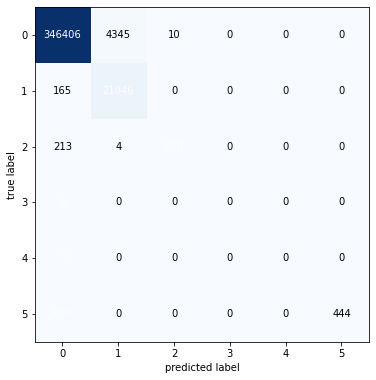

In [120]:
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix
import seaborn as sn

# confusion matrix
CM = confusion_matrix(y_test_rounded, yhat_classes)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(6, 8))
plt.show()

874288

In [144]:
y_syn_oh_train.shape

(874288, 5)

In [205]:
history = model.fit(X_syn_train, y_syn_oh_train, batch_size = 512, epochs = 50, verbose = 2, validation_split = 0.2)

Epoch 1/50
1363/1363 - 4s - loss: 0.3065 - accuracy: 0.9360 - val_loss: 0.2536 - val_accuracy: 0.9404 - 4s/epoch - 3ms/step
Epoch 2/50
1363/1363 - 3s - loss: 0.2536 - accuracy: 0.9390 - val_loss: 0.2485 - val_accuracy: 0.9404 - 3s/epoch - 2ms/step
Epoch 3/50
1363/1363 - 3s - loss: 0.2512 - accuracy: 0.9390 - val_loss: 0.2472 - val_accuracy: 0.9404 - 3s/epoch - 2ms/step
Epoch 4/50
1363/1363 - 3s - loss: 0.2504 - accuracy: 0.9390 - val_loss: 0.2470 - val_accuracy: 0.9404 - 3s/epoch - 2ms/step
Epoch 5/50
1363/1363 - 3s - loss: 0.2498 - accuracy: 0.9390 - val_loss: 0.2463 - val_accuracy: 0.9404 - 3s/epoch - 2ms/step
Epoch 6/50
1363/1363 - 3s - loss: 0.2495 - accuracy: 0.9390 - val_loss: 0.2460 - val_accuracy: 0.9404 - 3s/epoch - 2ms/step
Epoch 7/50
1363/1363 - 3s - loss: 0.2493 - accuracy: 0.9390 - val_loss: 0.2458 - val_accuracy: 0.9404 - 3s/epoch - 2ms/step
Epoch 8/50
1363/1363 - 3s - loss: 0.2492 - accuracy: 0.9390 - val_loss: 0.2463 - val_accuracy: 0.9404 - 3s/epoch - 2ms/step
Epoch 9/

In [207]:
# trained with synthetic data so now test with real data
score, acc = model.evaluate(X_syn_test, y_syn_oh_test ,verbose=2, batch_size= 512)

731/731 - 1s - loss: 0.2464 - accuracy: 0.9395 - 900ms/epoch - 1ms/step


In [208]:
yhat_probs= model.predict(X_syn_test)
yhat_classes= np.argmax(yhat_probs, axis=1)

In [209]:
yhat_classes = pd.DataFrame(yhat_classes)
yhat_classes.value_counts()

0    373820
dtype: int64

In [210]:
y_test_rounded = np.argmax(y_syn_oh_test, axis=1)

In [211]:
accuracy = accuracy_score(y_test_rounded, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test_rounded, yhat_classes, average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test_rounded, yhat_classes, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test_rounded, yhat_classes, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.939498
Precision: 0.882656


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Recall: 0.939498
F1 score: 0.910190


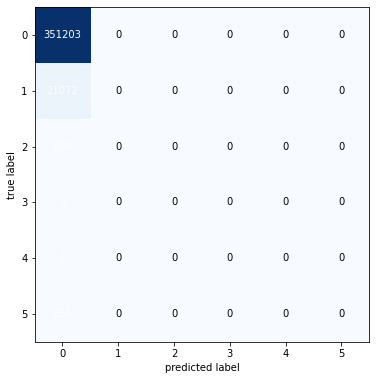

In [213]:
labels = [0, 1, 2, 3, 4, 5]

#print(cm)

# confusion matrix
CM = confusion_matrix(y_test_rounded, yhat_classes)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(6, 8))
plt.show()